<a href="https://colab.research.google.com/github/laiscnovoa/bootcamp-data/blob/main/DESAFIO_modelos_de_classifica%C3%A7%C3%A3o_e_regress%C3%A3o_log%C3%ADstica_individual.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## bibliotecas
import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns

#1. Usando o dataset iris

###a) Análise inicial

In [ ]:
# carregando dados
Iris = datasets.load_iris()
type(Iris)

sklearn.utils._bunch.Bunch

In [ ]:
# transformando em dataframe
iris = pd.DataFrame(data = Iris.data, columns = Iris.feature_names)
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
# conferindo se tem algum valor nulo
iris.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [ ]:
# tipos de dados em cada coluna
iris.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
dtype: object

###b) Use o boxplot e o histograma para caracterizar as propriedades de cada uma das espécies existentes.

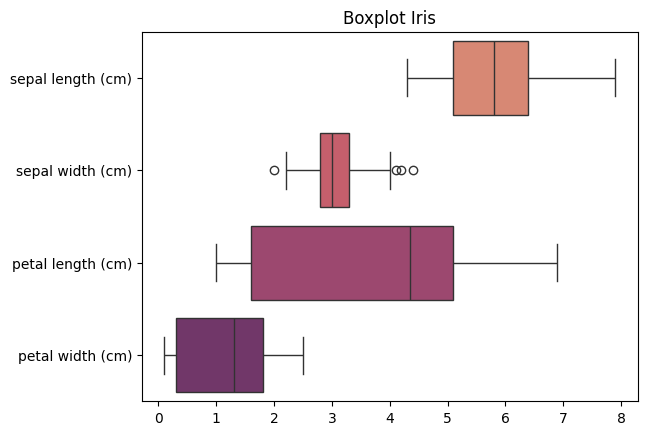

In [ ]:
# boxplot dos dados

sns.boxplot(data = iris, orient = 'h', palette = 'flare')

plt.title('Boxplot Iris')
plt.show()

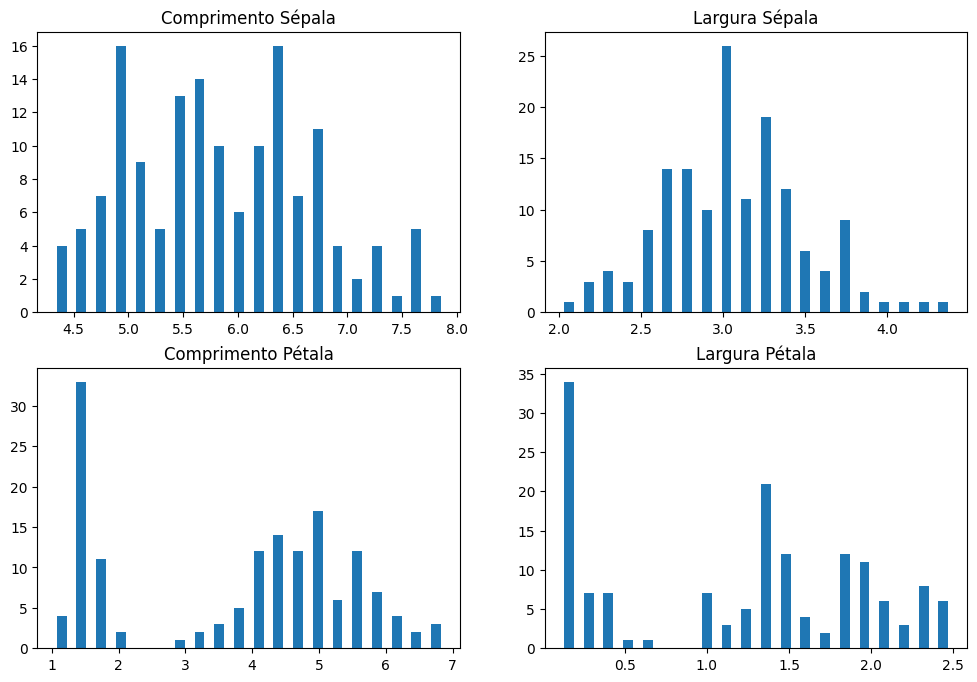

In [ ]:
# histograma dos dados
bins = 20
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

axs[0,0].hist(iris['sepal length (cm)'], bins = bins, rwidth = 0.5)
axs[0,0].set_title('Comprimento Sépala')
axs[0,1].hist(iris['sepal width (cm)'], bins = bins, rwidth = 0.5)
axs[0,1].set_title('Largura Sépala')
axs[1,0].hist(iris['petal length (cm)'], bins = bins, rwidth = 0.5)
axs[1,0].set_title('Comprimento Pétala')
axs[1,1].hist(iris['petal width (cm)'], bins = bins, rwidth = 0.5)
axs[1,1].set_title('Largura Pétala')

plt.show()

###c) Somente olhando esses gráficos, é possível utilizando uma ou mais das propriedades (Sepal_Length, Sepal_Width, Petal_Length, Petal_Width) que sejam suficientes para diferenciar entre as diferentes espécies?


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


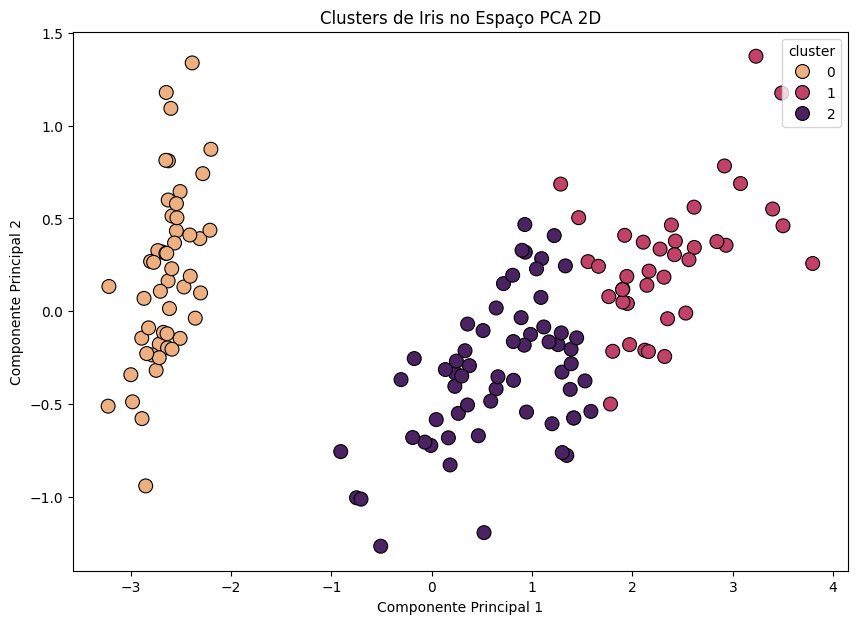

In [ ]:
#método PCA
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

#diminuindo a dimensão para 2 componentes
pca = PCA(n_components = 2)
componentes = pca.fit_transform(iris)
pca_df = pd.DataFrame(data = componentes, columns = ['PC1', 'PC2'])

#k-means para agrupar em 3 clusters
kmeans = KMeans(n_clusters = 3, random_state = 0)
kmeans.fit(pca_df)
pca_df['cluster'] = kmeans.labels_

#visualização dos clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PC1', y='PC2', hue='cluster', palette='flare', data=pca_df, s=100, edgecolor='k')
plt.title('Clusters de Iris no Espaço PCA 2D')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()

<ipython-input-10-01167e81040a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=Iris.target, y='sepal length (cm)', data=iris, palette='flare')


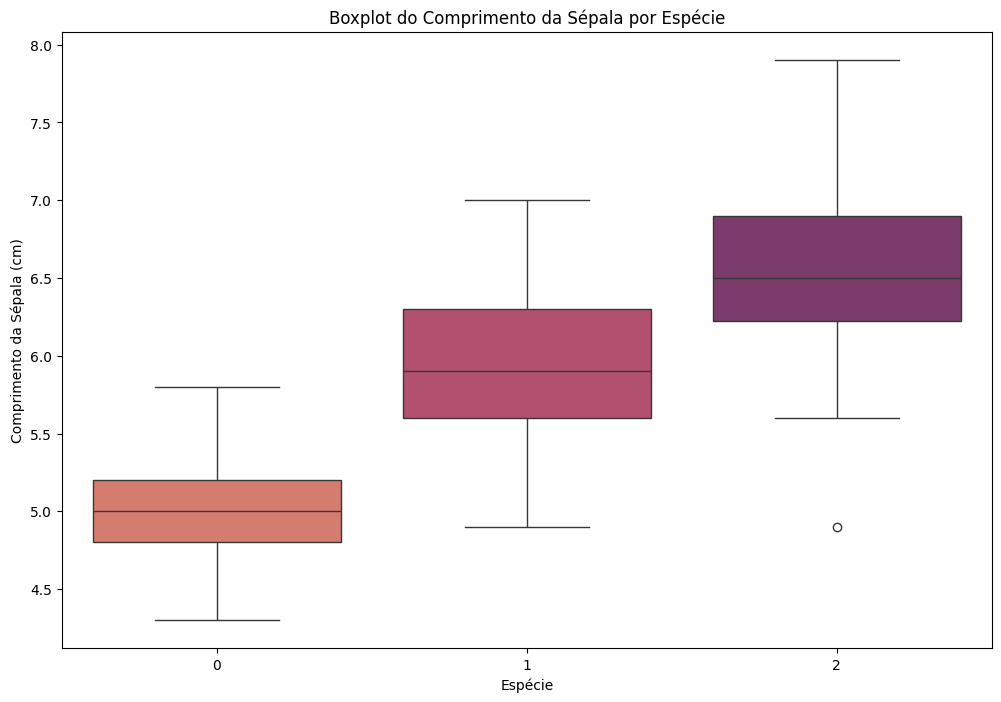

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(x=Iris.target, y='sepal length (cm)', data=iris, palette='flare')
plt.title('Boxplot do Comprimento da Sépala por Espécie')
plt.xlabel('Espécie')
plt.ylabel('Comprimento da Sépala (cm)')
plt.show()

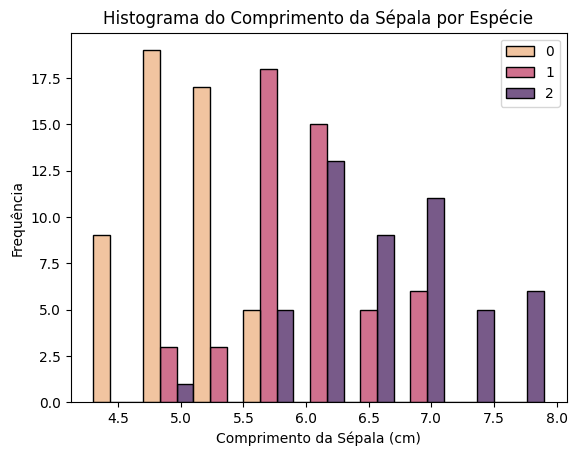

In [ ]:
sns.histplot(data=iris, x='sepal length (cm)', hue=Iris.target, multiple='dodge', palette='flare')
plt.title('Histograma do Comprimento da Sépala por Espécie')
plt.xlabel('Comprimento da Sépala (cm)')
plt.ylabel('Frequência')
plt.show()

###d) d. Aplique a regressão logística para avaliar o modelo de classificação.


In [ ]:
# bibliotecas

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss
from sklearn.linear_model import LogisticRegression

In [ ]:
#definir variável target
X = iris
y = Iris.target

#divisão dos dados em teste e treino
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

# treinar o modelo
modelo = LogisticRegression()
modelo.fit(X_train, y_train)

# aplicar o modelo fitado na base de teste e a previsão da probabilidade
y_pred = modelo.predict(X_test)

# relatório de classificação
print('Relatório de Classificação: ', classification_report(y_test, y_pred))

Relatório de Classificação:                precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



### e) Calcule a acurácia, precisão e recall.


In [ ]:
acuracia_iris = accuracy_score(y_test, y_pred)
precisao_iris = precision_score(y_test, y_pred, average = 'macro')
recall_iris = recall_score(y_test, y_pred, average = 'macro')

# Imprimir métricas
print("Acurácia:", acuracia_iris)
print("Precisão:", precisao_iris)
print("Recall:", recall_iris)

Acurácia: 0.9666666666666667
Precisão: 0.9696969696969697
Recall: 0.9666666666666667


###f) Plote a matriz de confusao com matplotlib ou seaborn

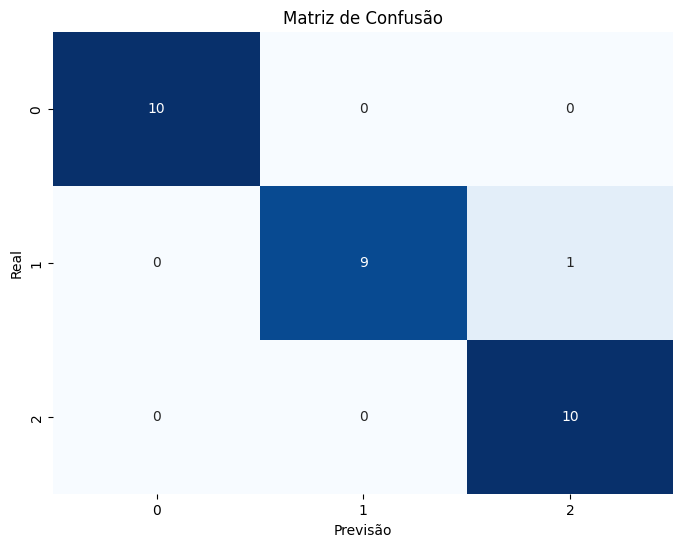

In [ ]:
matriz = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(matriz, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Previsão')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

# 2. Utilizando o dataset load_digits

### a. Faça uma análise inicial sobre esse dataset
i. Quantos dados possui?\
ii. Existem dados nulos? Se sim quantos?\
iii. Todos são dados numéricos ou existem colunas com dados categóricos?


In [ ]:
#importando o dataset
Digits = datasets.load_digits()
print(type(Digits))

# transformando em dataframe
digits = pd.DataFrame(data = Digits.data, columns = Digits.feature_names)
digits.head()

<class 'sklearn.utils._bunch.Bunch'>


,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [ ]:
print(digits.shape)
print(digits.isnull().sum())
print(digits.info())

(1797, 64)
pixel_0_0    0
pixel_0_1    0
pixel_0_2    0
pixel_0_3    0
pixel_0_4    0
            ..
pixel_7_3    0
pixel_7_4    0
pixel_7_5    0
pixel_7_6    0
pixel_7_7    0
Length: 64, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 64 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pixel_0_0  1797 non-null   float64
 1   pixel_0_1  1797 non-null   float64
 2   pixel_0_2  1797 non-null   float64
 3   pixel_0_3  1797 non-null   float64
 4   pixel_0_4  1797 non-null   float64
 5   pixel_0_5  1797 non-null   float64
 6   pixel_0_6  1797 non-null   float64
 7   pixel_0_7  1797 non-null   float64
 8   pixel_1_0  1797 non-null   float64
 9   pixel_1_1  1797 non-null   float64
 10  pixel_1_2  1797 non-null   float64
 11  pixel_1_3  1797 non-null   float64
 12  pixel_1_4  1797 non-null   float64
 13  pixel_1_5  1797 non-null   float64
 14  pixel_1_6  1797 non-null   float64
 15  pixel_1

O Dataset possui 64 colunas e 1767 linhas com dados. Todos não nulos e do tipo float64

### b. Aplique a regressão logística para avaliar o modelo de classificação.


In [ ]:
#definir variável target
X2 = digits
y2 = Digits.target

#divisão dos dados em teste e treino
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.2, random_state = 42, stratify = y2)

# treinar o modelo
modelo2 = LogisticRegression(max_iter = 10000)
modelo2.fit(X2_train, y2_train)

# aplicar o modelo fitado na base de teste
y2_pred = modelo2.predict(X2_test)

# relatório de classificação
print('Relatório de Classificação: ', classification_report(y2_test, y2_pred))

Relatório de Classificação:                precision    recall  f1-score   support

           0       0.97      1.00      0.99        36
           1       0.91      0.86      0.89        36
           2       1.00      1.00      1.00        35
           3       0.95      1.00      0.97        37
           4       0.97      1.00      0.99        36
           5       0.97      0.97      0.97        37
           6       1.00      0.97      0.99        36
           7       0.97      0.97      0.97        36
           8       0.86      0.89      0.87        35
           9       1.00      0.94      0.97        36

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360



### c. Calcule a acurácia, precisão e recall.


In [ ]:
acuracia_digits = accuracy_score(y2_test, y2_pred)
precisao_digits = precision_score(y2_test, y2_pred, average = 'macro')
recall_digits = recall_score(y2_test, y2_pred, average = 'macro')

# Imprimir métricas
print("Acurácia:", acuracia_digits)
print("Precisão:", precisao_digits)
print("Recall:", recall_digits)

Acurácia: 0.9611111111111111
Precisão: 0.9612734906852554
Recall: 0.960868725868726


### d. Plote a matriz de confusão com matplotlib ou seaborn


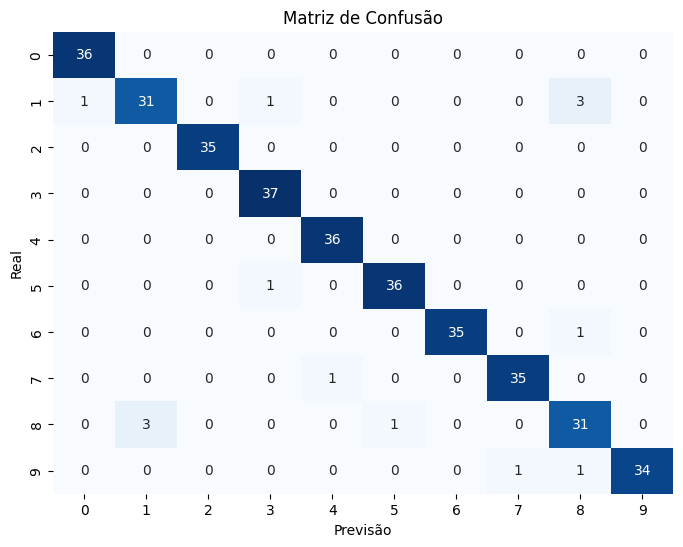

In [ ]:
matriz2 = confusion_matrix(y2_test, y2_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(matriz2, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Previsão')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

### e. Aplique a regressão logística para avaliar o modelo de classificação dos dígitos de 0-9 que são disponibilizados neste dataset.


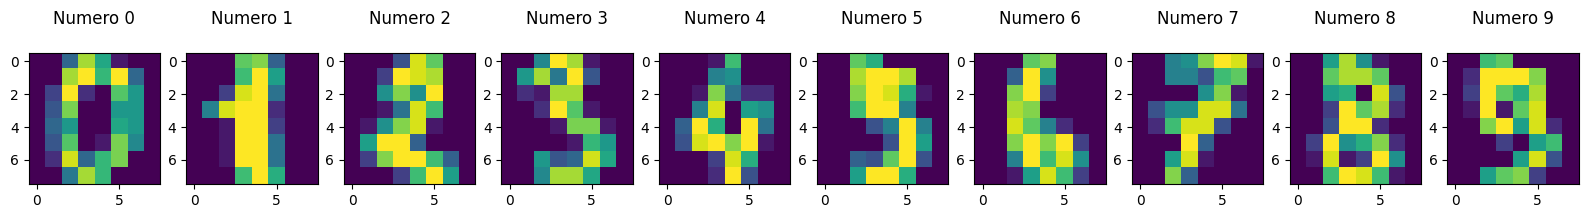

In [ ]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(Digits.data[0:10], Digits.target[0:10])):
  plt.subplot(1,10, index+1)
  plt.imshow(np.reshape(image, (8,8)))
  plt.title('Numero %i\n' %label)

In [ ]:
# definir variável e target
X3 = digits[:10]
y3 = Digits.target[:10]

# divisão dos dados entre teste e treino
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size = 0.2, random_state = 42)

#treinar o modelo
modelo3 = LogisticRegression(max_iter = 10000)
modelo3.fit(X3_train, y3_train)

#modelo fitado na base de teste
y3_pred = modelo3.predict(X3_test)

#printar o resultado
print('Relatório de classificação: ', classification_report(y3_test, y3_pred, zero_division = 1))

Relatório de classificação:                precision    recall  f1-score   support

           1       1.00      0.00      0.00       1.0
           2       0.00      1.00      0.00       0.0
           6       0.00      1.00      0.00       0.0
           8       1.00      0.00      0.00       1.0

    accuracy                           0.00       2.0
   macro avg       0.50      0.50      0.00       2.0
weighted avg       1.00      0.00      0.00       2.0



### f. Calcule a acurácia, precisão e recall.


In [ ]:
acuracia_09 = accuracy_score(y3_test, y3_pred)
precisao_09 = precision_score(y3_test, y3_pred, average = 'weighted', zero_division = 1)
recall_09 = recall_score(y3_test, y3_pred, average = 'weighted', zero_division = 1)

print('Acurácia: ', acuracia_09)
print('Precisão: ', precisao_09)
print('Recall: ', recall_09)

Acurácia:  0.0
Precisão:  1.0
Recall:  0.0


### g. Plote a matriz de confusao com matplotlib ou seaborn

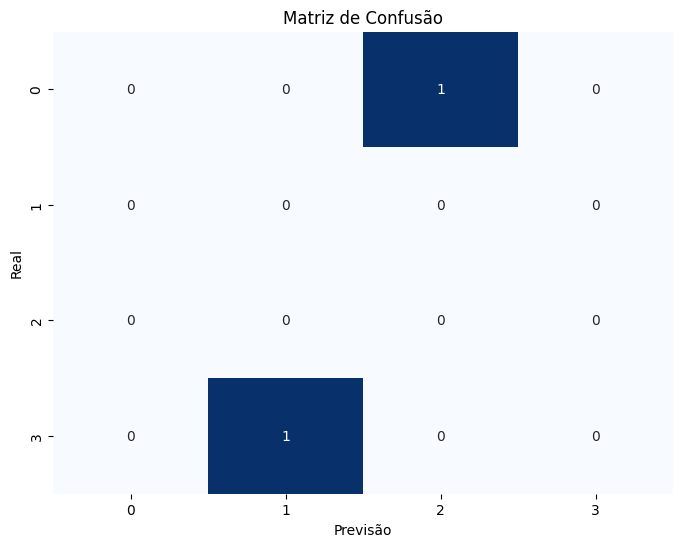

In [ ]:
matriz3 = confusion_matrix(y3_test, y3_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(matriz3, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Previsão')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()